In [1]:
import pandas as pd 
import numpy as np 
import os 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
from timeseries_graph_functions import *  # 시각화용 함수 만든것 불러오기 

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [4]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [6]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [7]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 상품군 : 가구 

In [8]:
furniture_raw = raw_data[raw_data['상품군'] == '가구']

In [9]:
focus_data = furniture_raw

In [10]:
focus_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 2834 to 35348
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2302 non-null   int64         
 1   방송일시        2302 non-null   datetime64[ns]
 2   노출(분)       2302 non-null   float64       
 3   마더코드        2302 non-null   int64         
 4   상품코드        2302 non-null   int64         
 5   상품명         2302 non-null   object        
 6   상품군         2302 non-null   object        
 7   판매단가        2302 non-null   int64         
 8   취급액         2302 non-null   int64         
 9   날짜          2302 non-null   int64         
 10  시간          2302 non-null   object        
 11  월           2302 non-null   int64         
 12  일           2302 non-null   int64         
 13  요일          2302 non-null   object        
 14  분기          2302 non-null   object        
 15  365일        2302 non-null   int64         
 16  계절          2302 non

In [11]:
focus_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
2834,2953,2019-02-01 22:00:00,20.00,100205,200733,보루네오 루나 유로탑 멀티수납형 LED 침대 SS 슈퍼싱글,가구,548000,7399000,20190201,...,2,1,금요일,Q1,32,겨울,20.00,0,146.75,14
2835,2954,2019-02-01 22:00:00,20.00,100205,200732,보루네오 루나 유로탑 멀티수납형 LED 침대 Q 퀸,가구,598000,3264000,20190201,...,2,1,금요일,Q1,32,겨울,20.00,0,121.60,5
2836,2955,2019-02-01 22:00:00,20.00,100205,200731,보루네오 루나 유로탑 멀티수납형 LED 침대 K 킹,가구,648000,5271000,20190201,...,2,1,금요일,Q1,32,겨울,20.00,0,135.77,8
2837,2956,2019-02-01 22:20:00,20.00,100205,200733,보루네오 루나 유로탑 멀티수납형 LED 침대 SS 슈퍼싱글,가구,548000,20638000,20190201,...,2,1,금요일,Q1,32,겨울,20.00,0,185.47,38
2838,2957,2019-02-01 22:20:00,20.00,100205,200732,보루네오 루나 유로탑 멀티수납형 LED 침대 Q 퀸,가구,598000,17701000,20190201,...,2,1,금요일,Q1,32,겨울,20.00,0,179.10,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35344,38267,2019-12-31 19:40:00,20.00,100594,201821,레스토닉 블루투스 LED 서랍 침대 퀸,가구,649000,12803000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,166.35,20
35345,38268,2019-12-31 19:40:00,20.00,100594,201823,레스토닉 블루투스 LED 서랍 침대 킹,가구,699000,12259000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,164.71,18
35346,38269,2019-12-31 20:00:00,20.00,100594,201819,레스토닉 블루투스 LED 서랍 침대 슈퍼싱글,가구,599000,17044000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,177.57,28
35347,38270,2019-12-31 20:00:00,20.00,100594,201821,레스토닉 블루투스 LED 서랍 침대 퀸,가구,649000,9966000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,157.10,15


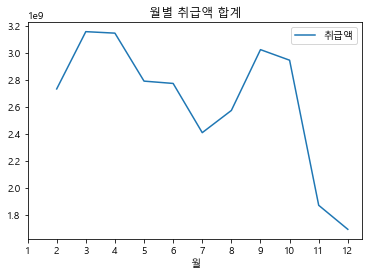

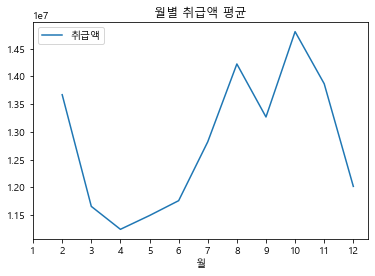

In [12]:
sales_by_month(focus_data)

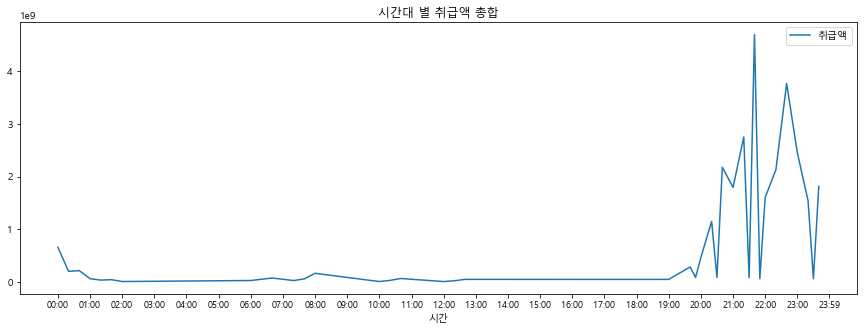

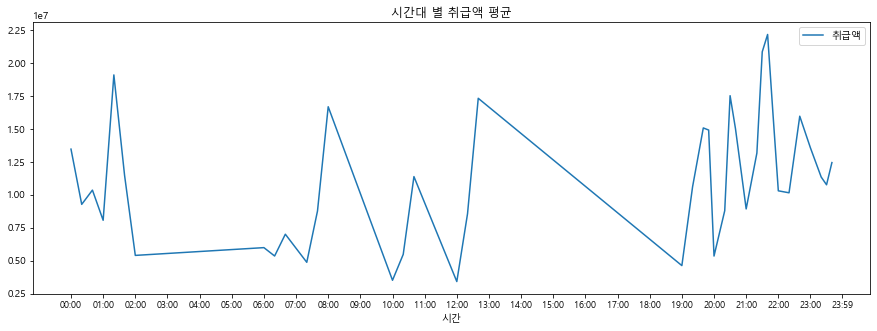

In [13]:
sales_by_time(focus_data)

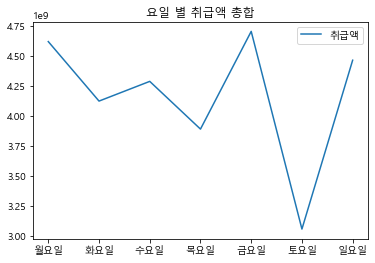

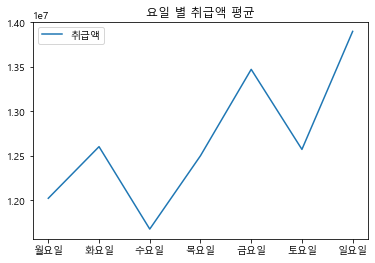

In [14]:
sales_by_yoill(focus_data)

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 총합')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 평균')


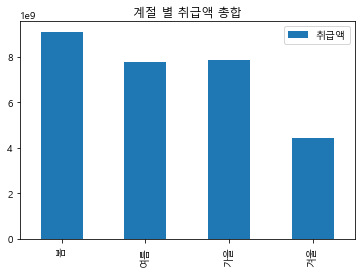

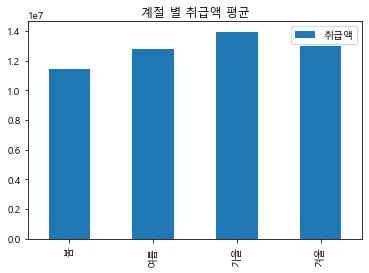

In [15]:
sales_by_season(focus_data)

In [16]:
soldout_by_season(focus_data)

    매진여부
계절      
가을     0
겨울     0
봄      0
여름     0


AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 총액')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 평균')


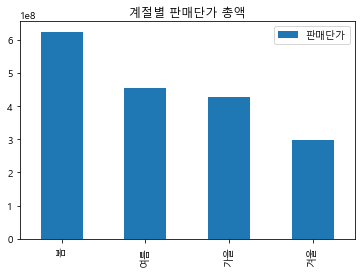

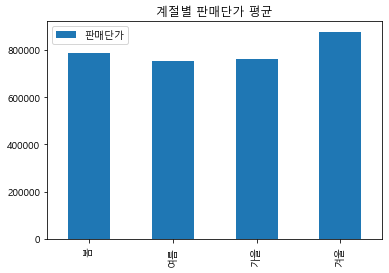

In [17]:
unitprice_by_season(focus_data)

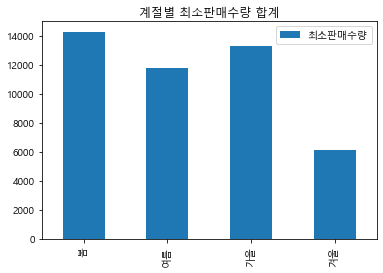

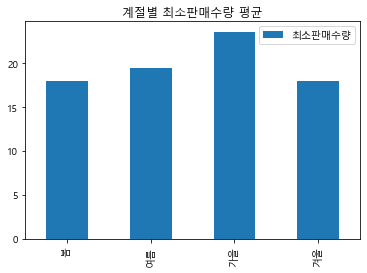

In [18]:
quantity_by_season(focus_data)

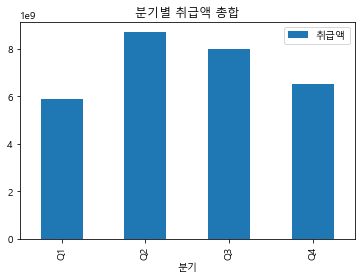

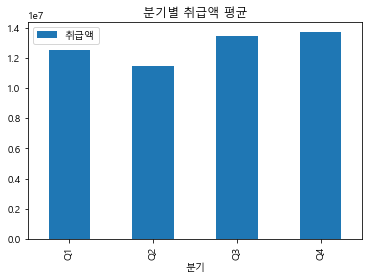

In [19]:
sales_by_Q(focus_data)

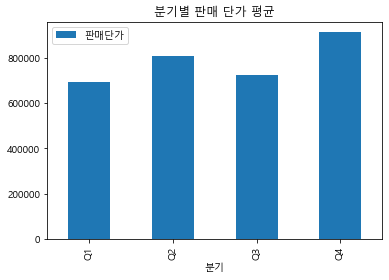

In [20]:
unitprice_by_Q(focus_data)

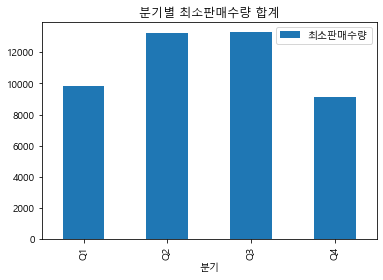

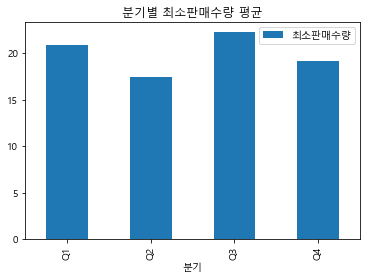

In [21]:
quantity_by_Q(focus_data)

In [26]:
def importance_by_season(data):
    sales_season = pd.DataFrame(data, columns=['취급액', '계절'])
    group_season = sales_season.groupby(['계절'])
    group_season

In [30]:
sales_season = pd.DataFrame(focus_data, columns = ['취급액', '계절'])
group_season = sales_season.groupby(["계절"])

In [32]:
group_season.sum()

,취급액
계절,
가을,7844519000
겨울,4428474000
봄,9098113000
여름,7760035000


In [114]:
sum_by_season = group_season.sum()

In [115]:
season_sum_sort = pd.DataFrame(sum_by_season, ("봄", "여름", "가을", "겨울"))

In [116]:
season_sum_sort

,취급액
봄,9098113000
여름,7760035000
가을,7844519000
겨울,4428474000


In [117]:
season_sum_sort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 봄 to 겨울
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   취급액     4 non-null      int64
dtypes: int64(1)
memory usage: 64.0+ bytes


In [118]:
season_sum_sort.shape

(4, 1)

In [119]:
display(season_sum_sort)

,취급액
봄,9098113000
여름,7760035000
가을,7844519000
겨울,4428474000


In [123]:
# season_sum_sort.append(pd.Series(season_sum_sort.iloc[:,0].sum(), name = "총합") )

,취급액,0
봄,9098113000.00,nan
여름,7760035000.00,nan
가을,7844519000.00,nan
겨울,4428474000.00,nan
총합,nan,29131141000.00


In [128]:
season_sum_sort = season_sum_sort.append(pd.Series(season_sum_sort.iloc[:].sum(), name = "총합") )

In [129]:
season_sum_sort

,취급액
봄,9098113000
여름,7760035000
가을,7844519000
겨울,4428474000
총합,29131141000


In [134]:
# season_sum_sort["비율"] = [i/season_sum_sort.iloc[-1,0] for i in  season_sum_sort ]

In [135]:
season_sum_sort["비율"] = 0

In [136]:
season_sum_sort

,취급액,비율
봄,9098113000,0
여름,7760035000,0
가을,7844519000,0
겨울,4428474000,0
총합,29131141000,0


In [137]:
for i in range(len(season_sum_sort)):
    season_sum_sort.iloc[i,1] = season_sum_sort.iloc[i,0]/season_sum_sort.iloc[-1,0]

In [138]:
season_sum_sort

,취급액,비율
봄,9098113000,0.31
여름,7760035000,0.27
가을,7844519000,0.27
겨울,4428474000,0.15
총합,29131141000,1.00


In [151]:
season_sum_sort = season_sum_sort.T

In [171]:
season_sum_sort


,봄,여름,가을,겨울,총합
취급액,9098113000.00,7760035000.00,7844519000.00,4428474000.00,29131141000.00
비율,0.31,0.27,0.27,0.15,1.00


In [167]:
ratio_per_season = pd.Series(season_sum_sort.iloc[1,:-1], name = "가구의 계절별 비중" )

In [174]:
ratio_per_season

봄    0.31
여름   0.27
가을   0.27
겨울   0.15
Name: 가구의 계절별 비중, dtype: float64

In [ ]:
df = DataFram

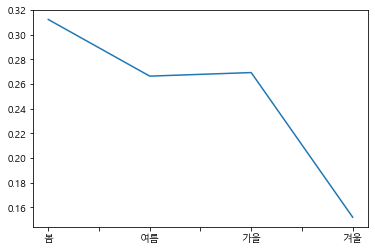

In [169]:
ratio_per_season.plot()

In [212]:
base_dir2 = "C:\\programming\\bigcontest_2020\\champion_league\\eda\\공유용 PPT\\summary_visual"
excel_file2 = "summary_visual.xlsx"

excel_dir2 = os.path.join(base_dir2,excel_file2)


In [259]:
df = pd.read_excel(excel_dir2,
                    sheet_name = "Sheet1",
#                     usecols= [1,2,3,4],
                        header = 0)

In [264]:
df2 = pd.read_excel(excel_dir2,
                    sheet_name = "Sheet2",
#                     usecols= [1,2,3,4],
                        header = 0)

SyntaxError: invalid syntax (<ipython-input-264-2211c2f66f38>, line 3)

In [232]:
df

,Unnamed: 0,봄,여름,가을,겨울
0,가구,0.31,0.27,0.27,0.15
1,가전,0.33,0.22,0.20,0.26
2,건강기능,0.17,0.28,0.31,0.24
3,농수축,0.15,0.27,0.30,0.29
4,생활용품,0.19,0.15,0.37,0.28
5,속옷,0.30,0.31,0.16,0.23
6,의류,0.30,0.25,0.21,0.24
7,이미용,0.13,0.15,0.38,0.34
8,잡화,0.24,0.27,0.31,0.17
9,주방,0.24,0.24,0.23,0.28


In [241]:
df.set_index(df.iloc[:,0], inplace=False)


,Unnamed: 0,봄,여름,가을,겨울
Unnamed: 0,,,,,
가구,가구,0.31,0.27,0.27,0.15
가전,가전,0.33,0.22,0.20,0.26
건강기능,건강기능,0.17,0.28,0.31,0.24
농수축,농수축,0.15,0.27,0.30,0.29
생활용품,생활용품,0.19,0.15,0.37,0.28
속옷,속옷,0.30,0.31,0.16,0.23
의류,의류,0.30,0.25,0.21,0.24
이미용,이미용,0.13,0.15,0.38,0.34
잡화,잡화,0.24,0.27,0.31,0.17


In [242]:
df.drop(df.columns[1], axis =1)

,Unnamed: 0,여름,가을,겨울
0,가구,0.27,0.27,0.15
1,가전,0.22,0.20,0.26
2,건강기능,0.28,0.31,0.24
3,농수축,0.27,0.30,0.29
4,생활용품,0.15,0.37,0.28
5,속옷,0.31,0.16,0.23
6,의류,0.25,0.21,0.24
7,이미용,0.15,0.38,0.34
8,잡화,0.27,0.31,0.17
9,주방,0.24,0.23,0.28


In [257]:
df = pd.DataFrame(df.iloc[:,1:5])

,Unnamed: 0,봄,여름,가을,겨울
0,가구,0.31,0.27,0.27,0.15
1,가전,0.33,0.22,0.20,0.26
2,건강기능,0.17,0.28,0.31,0.24
3,농수축,0.15,0.27,0.30,0.29
4,생활용품,0.19,0.15,0.37,0.28
5,속옷,0.30,0.31,0.16,0.23
6,의류,0.30,0.25,0.21,0.24
7,이미용,0.13,0.15,0.38,0.34
8,잡화,0.24,0.27,0.31,0.17
9,주방,0.24,0.24,0.23,0.28


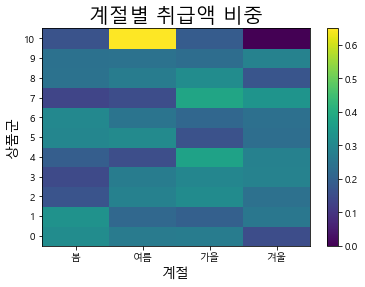

In [258]:

# heatmap by plt.pcolor()

plt.pcolor(df)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index)

plt.title('계절별 취급액 비중', fontsize=20)

plt.xlabel('계절', fontsize=14)

plt.ylabel('상품군', fontsize=14)

plt.colorbar()



plt.show()




In [265]:
df2

,Unnamed: 0,0시,1시,2시,6시,7시,8시,9시,10시,11시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,가구,0.04,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.13,0.32,0.26,0.20
1,가전,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.01,...,0.02,0.01,0.01,0.01,0.00,0.03,0.10,0.32,0.30,0.11
2,건강기능,0.02,0.02,0.00,0.08,0.23,0.07,0.07,0.04,0.03,...,0.08,0.02,0.03,0.02,0.02,0.04,0.05,0.02,0.00,0.03
3,농수축,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.05,0.06,...,0.04,0.06,0.20,0.24,0.16,0.03,0.03,0.03,0.02,0.01
4,생활용품,0.05,0.03,0.00,0.05,0.04,0.06,0.06,0.03,0.02,...,0.04,0.02,0.01,0.01,0.01,0.09,0.12,0.08,0.07,0.09
5,속옷,0.07,0.04,0.00,0.03,0.05,0.06,0.05,0.05,0.07,...,0.07,0.07,0.01,0.01,0.01,0.09,0.07,0.04,0.06,0.08
6,의류,0.06,0.03,0.00,0.05,0.08,0.10,0.12,0.08,0.06,...,0.06,0.05,0.01,0.01,0.00,0.05,0.05,0.03,0.03,0.05
7,이미용,0.04,0.04,0.00,0.03,0.05,0.06,0.07,0.04,0.02,...,0.07,0.05,0.07,0.03,0.02,0.07,0.07,0.05,0.03,0.04
8,잡화,0.05,0.04,0.00,0.02,0.07,0.09,0.11,0.12,0.11,...,0.08,0.05,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03
9,주방,0.00,0.00,0.00,0.02,0.03,0.05,0.07,0.08,0.07,...,0.06,0.11,0.07,0.05,0.03,0.05,0.05,0.04,0.05,0.02


In [271]:
df2 =  df2.drop(df2.columns[0], axis =1)

In [272]:
df2

,0시,1시,2시,6시,7시,8시,9시,10시,11시,12시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,0.04,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.13,0.32,0.26,0.20
1,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.02,...,0.02,0.01,0.01,0.01,0.00,0.03,0.10,0.32,0.30,0.11
2,0.02,0.02,0.00,0.08,0.23,0.07,0.07,0.04,0.03,0.04,...,0.08,0.02,0.03,0.02,0.02,0.04,0.05,0.02,0.00,0.03
3,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.05,0.06,0.03,...,0.04,0.06,0.20,0.24,0.16,0.03,0.03,0.03,0.02,0.01
4,0.05,0.03,0.00,0.05,0.04,0.06,0.06,0.03,0.02,0.05,...,0.04,0.02,0.01,0.01,0.01,0.09,0.12,0.08,0.07,0.09
5,0.07,0.04,0.00,0.03,0.05,0.06,0.05,0.05,0.07,0.03,...,0.07,0.07,0.01,0.01,0.01,0.09,0.07,0.04,0.06,0.08
6,0.06,0.03,0.00,0.05,0.08,0.10,0.12,0.08,0.06,0.04,...,0.06,0.05,0.01,0.01,0.00,0.05,0.05,0.03,0.03,0.05
7,0.04,0.04,0.00,0.03,0.05,0.06,0.07,0.04,0.02,0.07,...,0.07,0.05,0.07,0.03,0.02,0.07,0.07,0.05,0.03,0.04
8,0.05,0.04,0.00,0.02,0.07,0.09,0.11,0.12,0.11,0.06,...,0.08,0.05,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.03
9,0.00,0.00,0.00,0.02,0.03,0.05,0.07,0.08,0.07,0.08,...,0.06,0.11,0.07,0.05,0.03,0.05,0.05,0.04,0.05,0.02


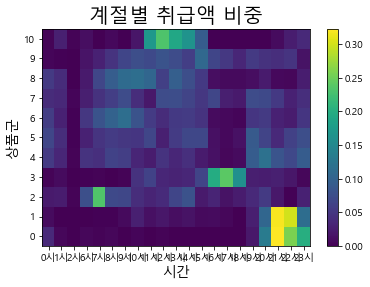

In [282]:

# heatmap by plt.pcolor()

plt.pcolor(df2)
plt.figsize = (200,100)
plt.xticks(np.arange(0.5, len(df2.columns), 1), df2.columns)
plt.yticks(np.arange(0.5, len(df2.index), 1), df2.index)

plt.title('계절별 취급액 비중', fontsize=20)

plt.xlabel('시간', fontsize=14)
plt.ylabel('상품군', fontsize=14)

plt.colorbar()



plt.show()


